#

In [2]:
#The version used this time
#Package            Version
#------------------ ------------
#python             3.13.0
#ggplot             0.11.5
#jupyter_client     8.6.3
#jupyter_core       5.7.2
#lets-plot          4.5.1
#matplotlib         3.9.2
#matplotlib-inline  0.1.7
#numpy              2.1.2
#pandas             2.2.3

In [3]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np

df = pd.read_csv(
    "https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv",
    skiprows=1,
    na_values="***",
)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    145 non-null    int64  
 1   Jan     145 non-null    float64
 2   Feb     145 non-null    float64
 3   Mar     145 non-null    float64
 4   Apr     145 non-null    float64
 5   May     145 non-null    float64
 6   Jun     145 non-null    float64
 7   Jul     145 non-null    float64
 8   Aug     145 non-null    float64
 9   Sep     145 non-null    float64
 10  Oct     144 non-null    float64
 11  Nov     144 non-null    float64
 12  Dec     144 non-null    float64
 13  J-D     144 non-null    float64
 14  D-N     143 non-null    float64
 15  DJF     144 non-null    float64
 16  MAM     145 non-null    float64
 17  JJA     145 non-null    float64
 18  SON     144 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.7 KB

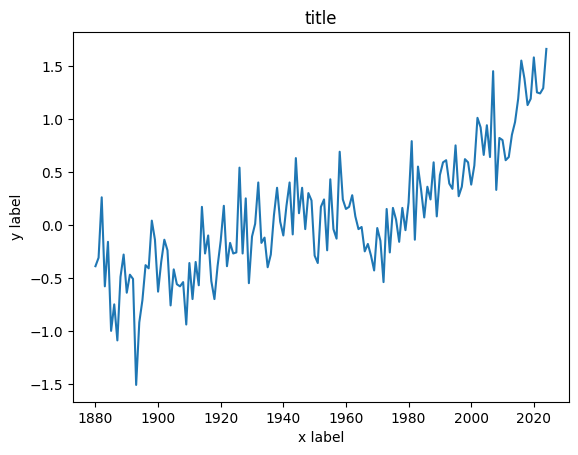

In [4]:
df = df.set_index("Year")
df.head()
df.tail()
fig, ax = plt.subplots()
# select the column to use 'plot' on, and pass the 'ax' object
# note that the horizontal axis is given by the index of the dataframe
df["Jan"].plot(ax=ax)
# set the labels and title
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
plt.show()

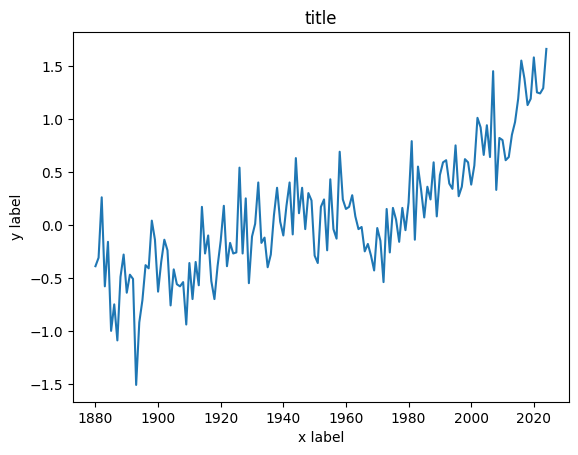

In [5]:
fig, ax = plt.subplots()
ax.plot(df.index, df["Jan"])
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
plt.show()

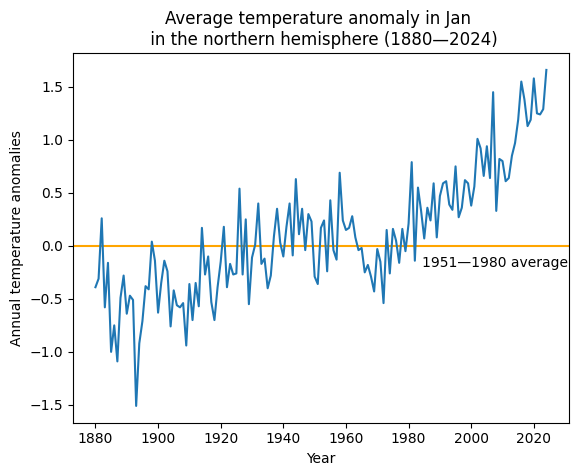

In [6]:
month = "Jan"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.66, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {month} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies");

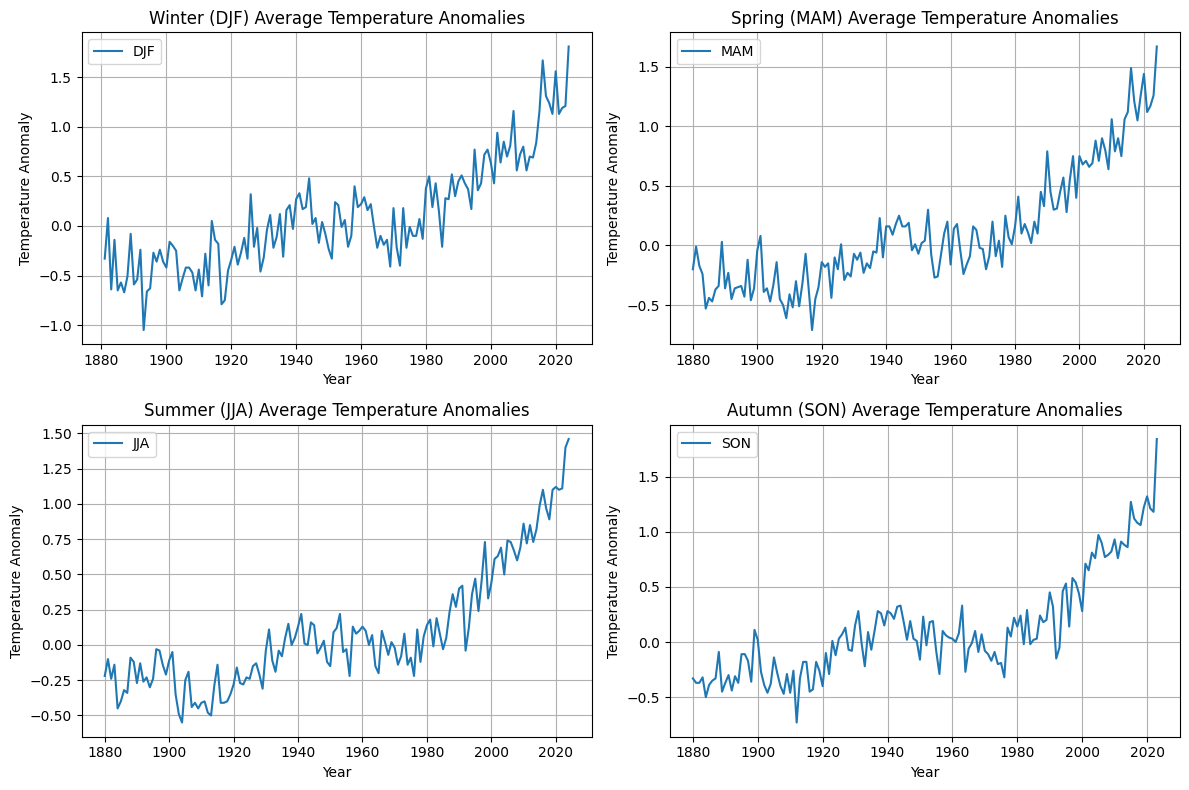

In [7]:
# Extra exercise 3
years = df.index.values
djf_data = df['DJF'].values
mam_data = df['MAM'].values
jja_data = df['JJA'].values
son_data = df['SON'].values
 
# 折线图
plt.figure(figsize=(12, 8))
 
# DJF季节
plt.subplot(2, 2, 1)
plt.plot(years, djf_data, label='DJF')
plt.title('Winter (DJF) Average Temperature Anomalies')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.grid(True)
plt.legend()
 
# MAM季节
plt.subplot(2, 2, 2)
plt.plot(years, mam_data, label='MAM')
plt.title('Spring (MAM) Average Temperature Anomalies')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.grid(True)
plt.legend()
 
# JJA季节
plt.subplot(2, 2, 3)
plt.plot(years, jja_data, label='JJA')
plt.title('Summer (JJA) Average Temperature Anomalies')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.grid(True)
plt.legend()
 
# SON季节
plt.subplot(2, 2, 4)
plt.plot(years, son_data, label='SON')
plt.title('Autumn (SON) Average Temperature Anomalies')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

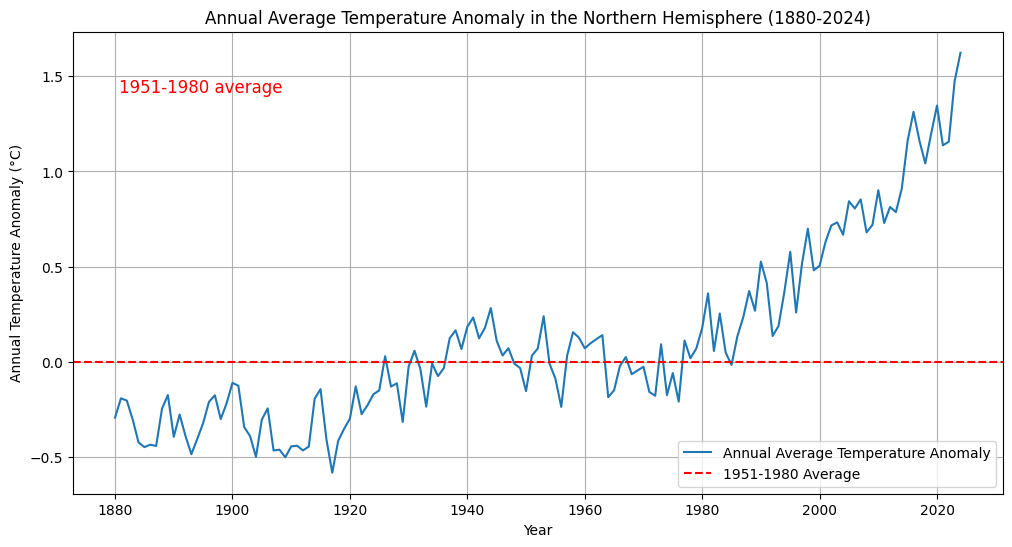

In [8]:
# Extra exercise 4

annual_mean = df.mean(axis=1) 
plt.figure(figsize=(12, 6))
plt.plot(annual_mean.index, annual_mean.values, label='Annual Average Temperature Anomaly')
plt.ylabel('Annual Temperature Anomaly (°C)')
plt.xlabel('Year')
plt.title('Annual Average Temperature Anomaly in the Northern Hemisphere (1880-{})'.format(annual_mean.index.max()))
 
mean_anomaly_1951_1980 = annual_mean.loc[1951:1980].mean()
 
plt.axhline(y=mean_anomaly_1951_1980, color='red', linestyle='--', label='1951-1980 Average')
plt.annotate(
    '1951-1980 average',
    xy=(annual_mean.index.min(), mean_anomaly_1951_1980 - 0.2), 
    xycoords=('data', 'data'),
    xytext=(0.05, 0.9), 
    textcoords='axes fraction',
    ha='left',
    va='top',
    fontsize=12,
    color='red'
)
 
plt.legend()
 
plt.grid(True)
 
plt.show()

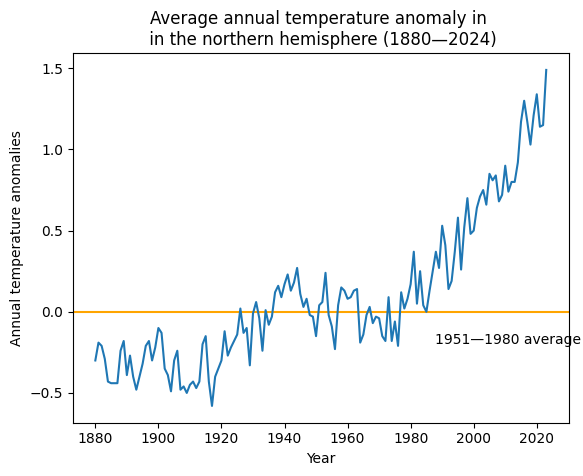

In [9]:
#4（a）
month = "J-D"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.68, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average annual temperature anomaly in \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies");

In [10]:
 
# 4(b): How do the graphs in questions 2 through 4(a) reflect the relationship between temperature and time?
# Horizontal axis: in this graph, the horizontal axis represents time (years) from 1880 to the most recent year
#Vertical axis: the vertical axis represents the average annual temperature anomaly (in degrees Celsius), which provides quantitative information about temperature change
#Trends and Patterns: By looking at the line graphs, we can recognize if the trend of temperature anomalies is increasing or decreasing as well as seasonal variations or long-term trends
#Horizontal line: The added horizontal line (representing the average temperature anomaly from 1951-1980) provides a reference point for comparing temperature anomalies across years

#5. You now have graphs for three different time intervals: monthly (Question 2), seasonal (Question 3), and annual (Question 4). For each of these time intervals, discuss what we can learn about patterns in temperature over time from the graphs for the other time intervals that we might not otherwise learn about
# (1) Months (Question 2)
# Understandable: seasonal changes, monthly graphs can clearly show seasonal fluctuations in temperature, i.e. hot and cold months of the year, # (1) Monthly (Question 2)
# Not Understandable: these data do not allow a direct look at long-term (e.g. decades) temperature trends.
#(2) Seasons (Question 3)
# Understandable: Seasonal charts can highlight differences in temperature between seasons.
#Not understandable: seasonal charts do not provide detailed information about temperature changes within a given month
#(3) Year (Q4)
# Understandable: long-term trends can be seen and annual charts are best for identifying long-term temperature trends
# Not understandable: annual charts do not capture temperature changes over monthly or shorter time intervals
#6. Compare the graph in Question 4 with Figure 1.5, which also shows temperature changes over time using data from the National Academy of Sciences.
# (1) Discuss similarities and differences between the graphs. (For example, are the horizontal and vertical axis variables the same, or are the lines the same shape?)
# Similarities: Both graphs have a horizontal axis that represents the year, a vertical axis that represents the temperature in degrees Celsius, and both use line graphs to depict temperature trends over time.
#Differences: graph 1.4 covers the period from 1880 to 2024, while image 1.5 covers the period from 1000 to 2000, with scales of 20 and 100 years. The vertical scale Figure 1.4 has a temperature change of 0.5 and Figure 1.5 has a temperature change of 0.2.
#(2) Looking at the temperature change over time from 1000 to 1900 in Figure 1.4, is the pattern observed in the graph unusual?
#The change in temperature over time from 1000 to 1900, the red line has a significant upward trend in 1900 and 2000, which to some extent may indicate a warming trend .
#(3) Based on your answers to questions 4 and 5, do you think the government should be concerned about climate change?
#From the comparison of the above data, it can be seen that the global climate is now accelerating warming and the temperature is rising, so the government should pay attention to the climate change and deal with global warming. It should develop mitigation measures such as reducing greenhouse gas emissions and developing renewable energy to slow down the rate of global warming.



In [11]:
#Part 1.2 Variation in temperature over time

In [12]:
#Question 1
df["Period"] = pd.cut(
    df.index,
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)
df["Period"].tail(20)


Year
2005    1981—2010
2006    1981—2010
2007    1981—2010
2008    1981—2010
2009    1981—2010
2010    1981—2010
2011          NaN
2012          NaN
2013          NaN
2014          NaN
2015          NaN
2016          NaN
2017          NaN
2018          NaN
2019          NaN
2020          NaN
2021          NaN
2022          NaN
2023          NaN
2024          NaN
Name: Period, dtype: category
Categories (3, object): ['1921—1950' < '1951—1980' < '1981—2010']

In [13]:
list_of_months = ["Jun", "Jul", "Aug"]
df[list_of_months].stack().head()


Year     
1880  Jun   -0.18
      Jul   -0.22
      Aug   -0.26
1881  Jun   -0.34
      Jul    0.09
dtype: float64

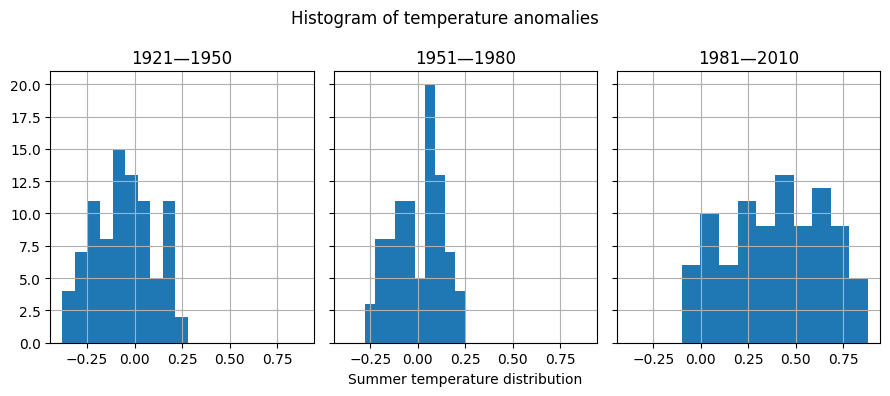

In [14]:
#Question 2（a）
fig, axes = plt.subplots(ncols=3, figsize=(9, 4), sharex=True, sharey=True)
for ax, period in zip(axes, df["Period"].dropna().unique()):
    df.loc[df["Period"] == period, list_of_months].stack().hist(ax=ax)
    ax.set_title(period)
plt.suptitle("Histogram of temperature anomalies")
axes[1].set_xlabel("Summer temperature distribution")
plt.tight_layout();

#Question 2（b）
#（1）similarities：The distribution of temperature anomalies shows a gradual increase from left to right in both time periods
#（2）differences：The overall height of the histogram is higher in 1981-2010 than in 1951-1980, and the frequency of temperature anomalies increases during 1981-2010.



In [15]:
#Question 3
temp_all_months = df.loc[(df.index >= 1951) & (df.index <= 1980), "Jan":"Dec"]
# Put all the data in stacked format and give the new columns sensible names
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
# Take a look at this data:
temp_all_months

360 rows × 3 columns

In [16]:
quantiles = [0.3, 0.7]
list_of_percentiles = np.quantile(temp_all_months["values"], q=quantiles)

print(f"The cold threshold of {quantiles[0]*100}% is {list_of_percentiles[0]}")
print(f"The hot threshold of {quantiles[1]*100}% is {list_of_percentiles[1]}")

The cold threshold of 30.0% is -0.1
The hot threshold of 70.0% is 0.1

In [17]:
#Question 4
temp_all_months = df.loc[(df.index >= 1981) & (df.index <= 2010), "Jan":"Dec"]
# Put all the data in stacked format and give the new columns sensible names
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
# Take a look at the start of this data data:
temp_all_months.head()

In [18]:
entries_less_than_q30 = temp_all_months["values"] < list_of_percentiles[0]
proportion_under_q30 = entries_less_than_q30.mean()
print(
    f"The proportion under {list_of_percentiles[0]} is {proportion_under_q30*100:.2f}%"
)

The proportion under -0.1 is 1.94%

In [19]:
proportion_over_q70 = (temp_all_months["values"] > list_of_percentiles[1]).mean()
print(f"The proportion over {list_of_percentiles[1]} is {proportion_over_q70*100:.2f}%")

The proportion over 0.1 is 84.72%

In [20]:
#Question 5（a）
temp_all_months = (
    df.loc[:, "DJF":"SON"]
    .stack()
    .reset_index()
    .rename(columns={"level_1": "Season", 0: "Values"})
)
temp_all_months["Period"] = pd.cut(
    temp_all_months["Year"],
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)
# Take a look at a cut of the data using `.iloc`, which provides position
temp_all_months.iloc[-135:-125]

In [21]:
grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
    ["mean", "var"]
)
grp_mean_var

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12184\1296543822.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(

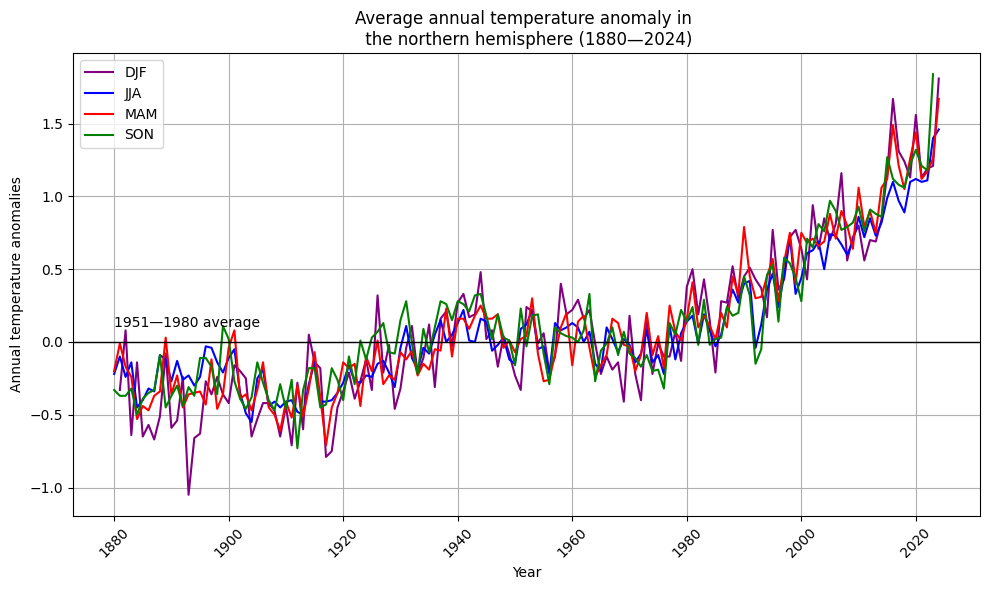

In [22]:
#Question 5（b）
min_year = 1880
# Because the sample code ggplot with my current version of pandas is not compatible, the following use of matplotlib.pyplot function
plt.figure(figsize=(10, 6))
 
season_colors = {
    'DJF': 'purple',
    'JJA': 'blue',
    'MAM': 'red',
    'SON': 'green'
} 
 

for season, group in temp_all_months.groupby('Season'):
    color = season_colors.get(season, 'black')  
    plt.plot(group['Year'], group['Values'], label=season, color=color)
 
plt.axhline(y=0, color='black', linewidth=1)

plt.title(f"Average annual temperature anomaly in \n the northern hemisphere ({min_year}—{temp_all_months['Year'].max()})")
plt.ylabel("Annual temperature anomalies")
plt.xlabel("Year")
 
plt.xticks(rotation=45)
 
plt.text(min_year, 0.1, '1951—1980 average', horizontalalignment='left', color='black')

plt.legend()
 
# 显示图表
plt.grid(True)
plt.tight_layout() 
plt.show()

In [23]:
#Part 1.3 Carbon emissions and the environment

In [24]:
#Question 1
#The relatively remote and elevated location of Mauna Loa Observatory on a mountaintop on the Big Island of Hawaii helps to minimize the impact of localized pollution on the observational data, which are analyzed and interpreted by authorities such as the Earth System Research Laboratory (ESRL), often taking into account a variety of factors, including meteorological conditions, atmospheric circulation patterns, and anthropogenic impacts on atmospheric constituents, which are of significant informational value as described above.
#Question 2
#The difference between trend and interpolated is mainly due to their different emphasis. trend focuses more on long-term, stable trends, whereas interpolated focuses more on data completeness and continuity, and seasonal variations in CO2 levels are affected by a variety of factors, which together determine the spatial and temporal distributions of atmospheric CO2 concentrations.

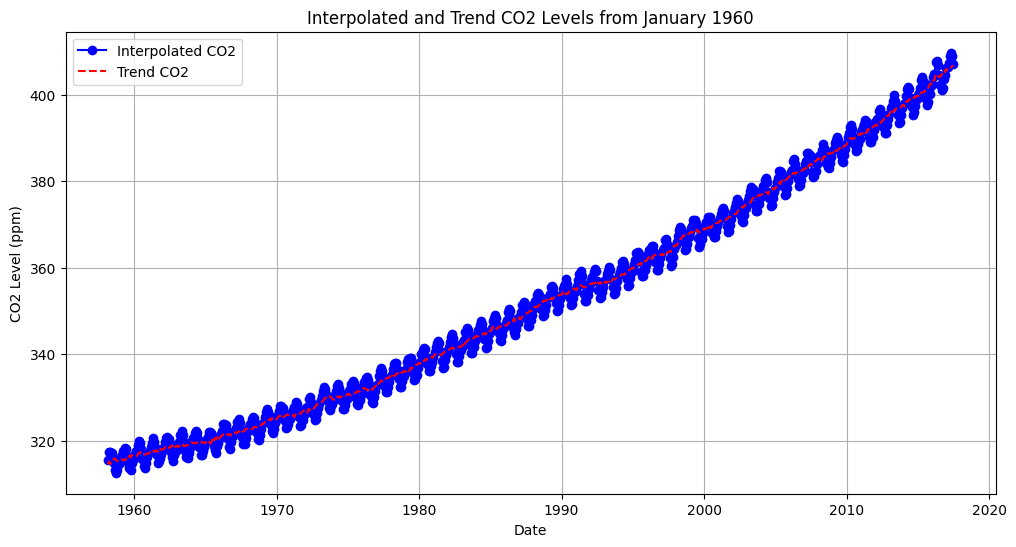

In [25]:
#Question 3
#CO2 is proportional to time.
data = pd.read_csv('data/1_CO2-data.csv')
 
data['Month'] = data['Month'].astype(str).str.zfill(2) 
data['Date'] = data.apply(lambda row: f"{row['Year']}-{row['Month']}-01", axis=1)
 
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)



fig, ax = plt.subplots(figsize=(12, 6))
 
# 插值CO2数据
ax.plot(data.index, data['Interpolated'], label='Interpolated CO2', color='blue', marker='o')
 
# 趋势CO2数据
ax.plot(data.index, data['Trend'], label='Trend CO2', color='red', linestyle='--')
 
ax.set_title('Interpolated and Trend CO2 Levels from January 1960')
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Level (ppm)')
 
plt.legend()
plt.grid(True)
 
plt.show()


In [26]:
#Question 4（a）
df_co2 = pd.read_csv("data/1_CO2-data.csv")
df_co2.head()

In [27]:
df_co2_june = df_co2.loc[df_co2["Month"] == 6]
df_co2_june.head()

In [28]:
df_temp_co2 = pd.merge(df_co2_june, df, on="Year")
df_temp_co2[["Year", "Jun", "Trend"]].head()

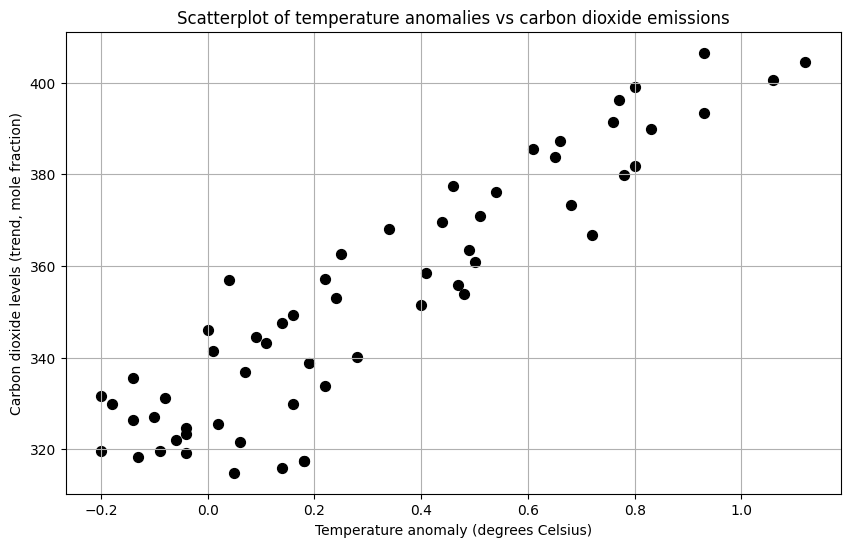

In [29]:
# Because the sample code ggplot with my current version of pandas is not compatible, the following use of matplotlib.pyplot function
plt.figure(figsize=(10, 6))
 
plt.scatter(df_temp_co2['Jun'], df_temp_co2['Trend'], color='black', s=50)  
 
plt.title("Scatterplot of temperature anomalies vs carbon dioxide emissions")
plt.ylabel("Carbon dioxide levels (trend, mole fraction)")
plt.xlabel("Temperature anomaly (degrees Celsius)")
 
plt.grid(True) 
plt.show()


In [30]:
#Question 4（b）
df_temp_co2[["Jun", "Trend"]].corr(method="pearson")

#Question 4（c）：The Pearson correlation coefficient only indicates linear correlation between variables and does not imply causation. Even if there is a high correlation between two variables, it cannot be directly inferred that there is a causal relationship between them

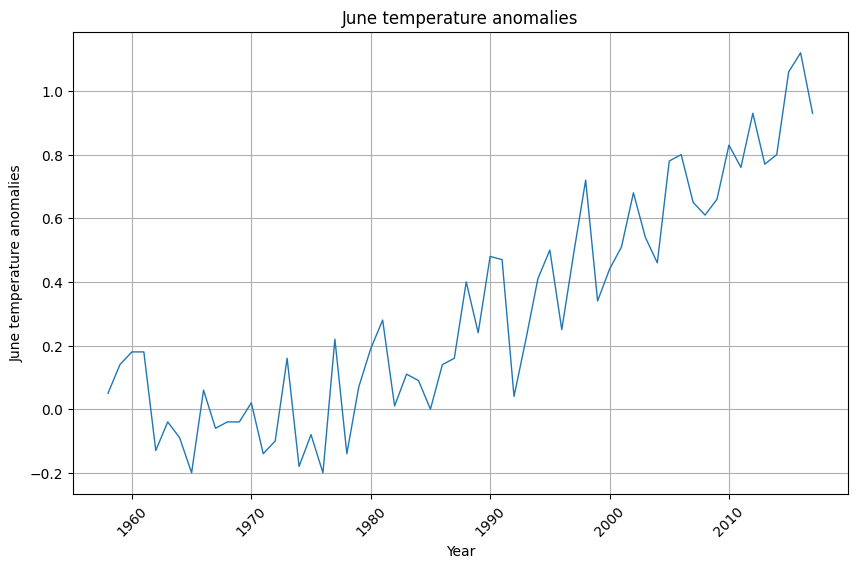

In [31]:
# Because the sample code ggplot with my current version of pandas is not compatible, the following use of matplotlib.pyplot function
plt.figure(figsize=(10, 6))
 
plt.plot(df_temp_co2['Year'], df_temp_co2['Jun'], linewidth=1)
 
plt.title("June temperature anomalies")
plt.xticks(rotation=45) 
 
plt.xlabel("Year")
plt.ylabel("June temperature anomalies")
plt.grid(True) 
plt.show()

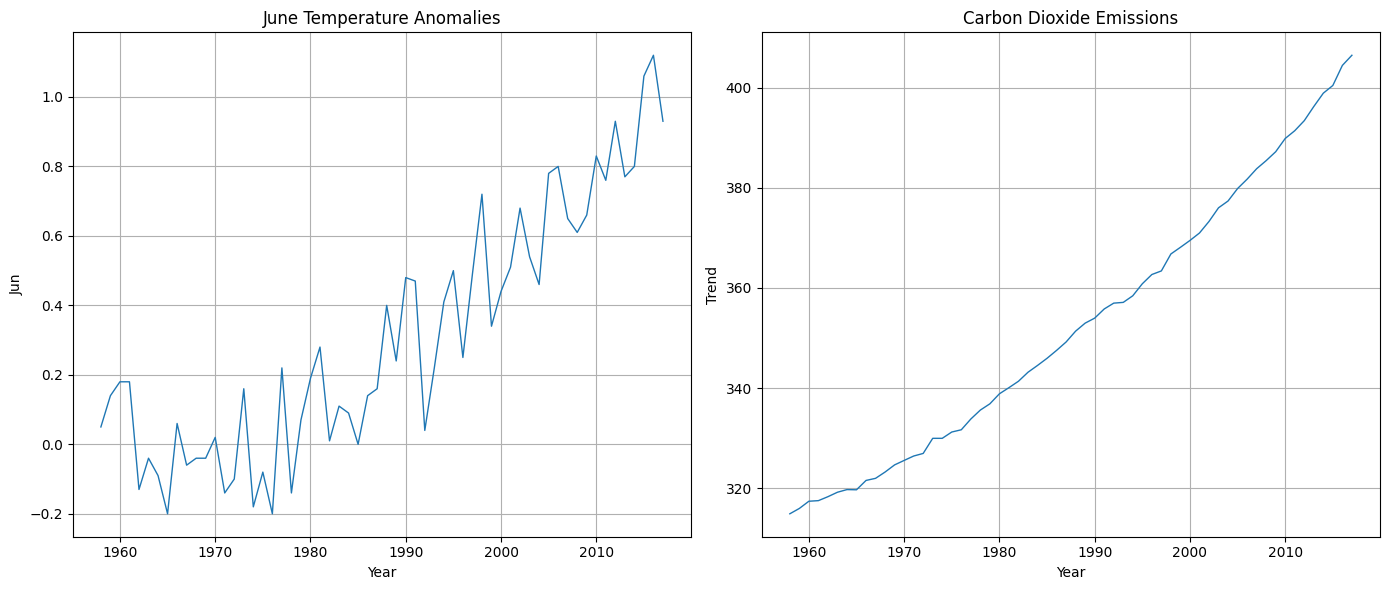

In [32]:
# Because the sample code ggplot with my current version of pandas is not compatible, the following use of matplotlib.pyplot function
def plot_data(df, x_col, y_col, title, ax):
    ax.plot(df[x_col], df[y_col], linewidth=1)
    
    ax.set_title(title)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col.replace('_', ' ').capitalize())
    
    ax.grid(True)
 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
 
plot_data(df_temp_co2, 'Year', 'Jun', 'June Temperature Anomalies', ax1)
 
plot_data(df_temp_co2, 'Year', 'Trend', 'Carbon Dioxide Emissions', ax2)
 
plt.tight_layout()
 
plt.show()

January Pearson: 0.8280347102335861
July Pearson: 0.9096960952776127

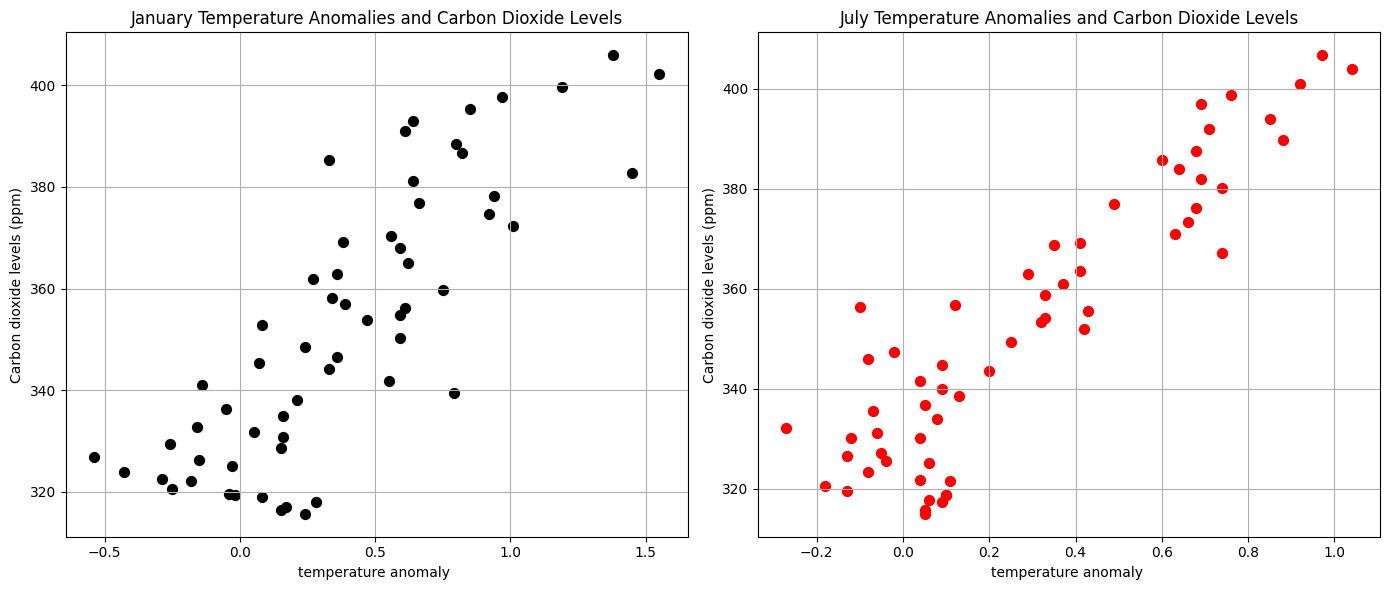

In [33]:
# Extra exercise 5
df_co2 = pd.read_csv("data/1_CO2-data.csv")

df = pd.read_csv(
    "https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv",
    skiprows=1,
    na_values="***",
)
 
df_co2_jan = df_co2.loc[df_co2["Month"] == 1, ["Year", "Trend"]].rename(columns={"Trend": "CO2_Jan"})
df_co2_jul = df_co2.loc[df_co2["Month"] == 7, ["Year", "Trend"]].rename(columns={"Trend": "CO2_Jul"})
df.reset_index(inplace=True)
df_temp_co2_jan = pd.merge(df_co2_jan, df[["Year", "Jan"]], on="Year")
 
df_temp_co2_jul = pd.merge(df_co2_jul, df[["Year", "Jul"]], on="Year")

correlation_jan = df_temp_co2_jan['Jan'].corr(df_temp_co2_jan['CO2_Jan'])
correlation_jul = df_temp_co2_jul['Jul'].corr(df_temp_co2_jul['CO2_Jul'])
 
print(f"January Pearson: {correlation_jan}")
print(f"July Pearson: {correlation_jul}")
 
# 绘制散点图
plt.figure(figsize=(14, 6))
 
# 一月散点图
plt.subplot(1, 2, 1)
plt.scatter(df_temp_co2_jan['Jan'], df_temp_co2_jan['CO2_Jan'], color='black', s=50)
plt.title("January Temperature Anomalies and Carbon Dioxide Levels")
plt.ylabel("Carbon dioxide levels (ppm)")
plt.xlabel("temperature anomaly ")
plt.grid(True)
 
# 七月散点图
plt.subplot(1, 2, 2)
plt.scatter(df_temp_co2_jul['Jul'], df_temp_co2_jul['CO2_Jul'], color='red', s=50)
plt.title("July Temperature Anomalies and Carbon Dioxide Levels")
plt.ylabel("Carbon dioxide levels (ppm)")
plt.xlabel("temperature anomaly ")
plt.grid(True)
 
plt.tight_layout()
plt.show()

#QA：The graph visualizes the distribution of data between temperature anomalies and CO₂ levels for January and July in the form of a scatter plot.
# It can be seen from the graph that as the temperature anomaly increases, the CO₂ level shows a corresponding increasing trend, 
# and there is a significant linear positive correlation between the CO₂ level and the temperature anomaly

In [34]:
#Question 6（a）
#Although correlation and causation are both concepts that describe the relationship between variables
#but they are different in nature,Correlation only reveals the association between variables
# while causation points out the causal link between variables
#In practice, we need to analyze the data carefully to avoid being misled by false correlations and try to determine the true relationship between variables

#Question 6（b）
#In analyzing the data, a negative correlation was found between urban green coverage and carbon dioxide levels
#and it was concluded that increasing green coverage was an effective means of reducing carbon dioxide levels.
#The result was that areas with high urban green coverage tended to be residential, commercial or park areas with less human activity
#while areas with higher carbon dioxide levels tended to be industrial or heavily trafficked areas.
#Therefore, it is the intensity and type of human activity,
# rather than the percentage of green cover, that is the real cause of the difference in CO2 levels

#Question 6（c）
#I think the correlation in this example is less likely to be coincidental and more likely to be a spurious correlation caused by one or more other variables. 
#The correlation is statistically significant but not causally related in substance, and both may be influenced by some economic, social, or cultural trend.
# For example, people may be more inclined to engage in recreational activities (e.g., searching for information about “batman”) during a boom
#and the security industry may expand as a result of increased business activity. Conversely, these trends may be reversed during economic downturns.